1) Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.


https://trends.google.com/trends/explore?q=%2Fm%2F0dl567,%2Fm%2F0261x8t&date=now%207-d&geo=US

a. Import the data into a pandas dataframe

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modules for statistics
import math
import statistics
from scipy import stats

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time

from statsmodels.tsa.arima_model import ARMA





df = pd.read_csv("multiTimeline.csv",parse_dates=True, index_col='Time')
df

,Taylor Swift: (United States),Kim Kardashian: (United States)
Time,,
2021-11-24 20:00:00,10,9
2021-11-24 21:00:00,10,10
2021-11-24 22:00:00,10,10
2021-11-24 23:00:00,10,10
2021-11-25 00:00:00,10,11
...,...,...
2021-12-01 15:00:00,4,3
2021-12-01 16:00:00,4,3
2021-12-01 17:00:00,4,3


b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset

c. Run either an ARMA, ARIMA, or SARIMA on it

In [69]:
import warnings
warnings.filterwarnings('ignore')

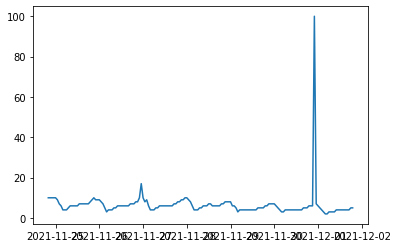

In [70]:
plt.plot(df.index, df['Taylor Swift: (United States)'])

<AxesSubplot:xlabel='Time'>

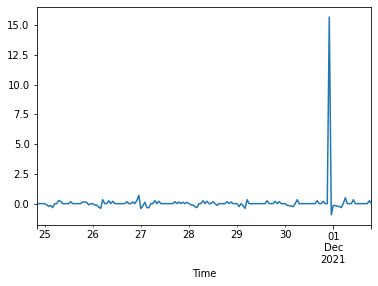

In [71]:
#to transform a stationary process
df['Return']=df['Taylor Swift: (United States)'].pct_change() #percent change
df['Return'].plot()

In [72]:
df = df.dropna()

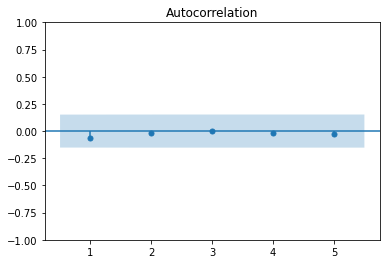

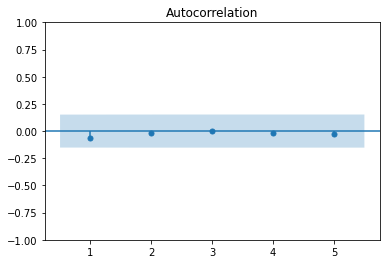

In [73]:
#AUTOCORRELATION
plot_acf(df[['Return']], zero = False, lags = 5, missing='conservative')

#1 lag exceeds the confidence interval

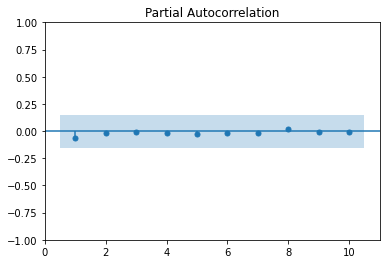

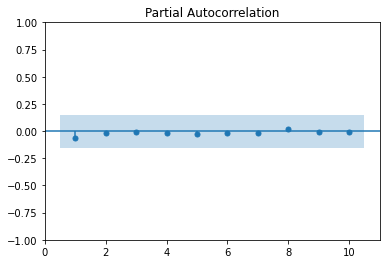

In [76]:
#PARTIAL AUTOCORRELATION
plot_pacf(df[['Return']], zero = False, lags = 10)


#plot_pacf(df[['Return']], zero = False, lags = 10)

In [84]:
#first value for order indicates AR lags
#second value for order indicated MA lags

model = ARMA(df['Return'],order=(0,0))

#model = ARMA(df['Return'],order=(1,1))

# fit the model to the data
results = model.fit()

#plot the forecasted return for the next 10 days
results_df = pd.DataFrame(results.forecast(steps=10)[0])
results_df.head()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


d. Explain the results

2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements.


Fourier Transform is a mathematical operation that turns the x-axis of a signal(smoothie) from time to frequency. 

It maps out how often values occur during that time series or how often each frequency occured during that timeframe. 

Analogy: Any signal (smoothie) can be made from some combination of circular paths (ingrediants). For each circular path there is frequency (speed), angle and amplitude(size) 

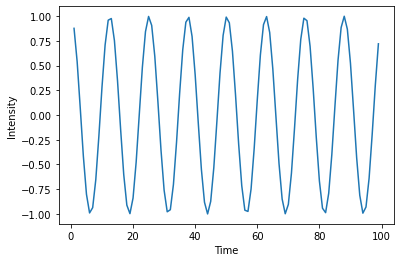

In [85]:
x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

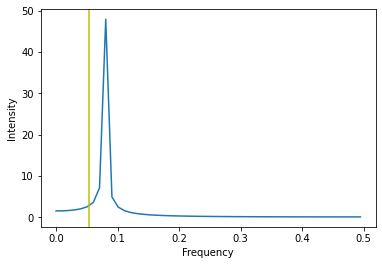

In [86]:
#power spectral density
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()